In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt
import pickle


In [3]:
# 读取数据
data = pd.read_csv(r'D:\ArcgisData\pred_organic_p_n\feature_table\feature_table_result\sy_tl_result.csv')
print(len(data))
# 删除有缺失值的行
data.dropna(inplace=True)
len(data),data.columns


594


(593,
 Index(['SYsamplepro', 'TL', 'A', 'B', 'C', 'D', 'DEM', 'TWI5', 'TPI201',
        'TPI101', 'TPI11', 'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH',
        'NDVI', 'CUR', 'ASP', 'PLCUR', 'POCUR', 'OSJL', 'LAT', 'LON', 'DZ',
        'DL', 'TRI'],
       dtype='object'))

In [4]:
data.drop(['SYsamplepro','TL','B','C','D','TPI201','TPI11','TPI3','SOILQS','CUR','ASP','PLCUR','POCUR','OSJL','TRI'], axis=1, inplace=True)
data.columns

Index(['A', 'DEM', 'TWI5', 'TPI101', 'TMP', 'SLOP', 'PRE', 'NIGTH', 'NDVI',
       'LAT', 'LON', 'DZ', 'DL'],
      dtype='object')

In [5]:
data['DL'] = data['DL'].astype(str)
data['DZ'] = data['DZ'].astype(str)
data.dtypes

A           int64
DEM       float64
TWI5      float64
TPI101    float64
TMP       float64
SLOP      float64
PRE       float64
NIGTH     float64
NDVI      float64
LAT       float64
LON       float64
DZ         object
DL         object
dtype: object

In [6]:
data

,A,DEM,TWI5,TPI101,TMP,SLOP,PRE,NIGTH,NDVI,LAT,LON,DZ,DL
0,6,912.9000,5.059266,-13.930603,157.500000,12.184737,805.0000,0.41,5761.0,2720980.0,454720.0,1,7
1,7,927.6500,3.533883,23.411438,159.500000,36.000023,806.3333,0.49,5546.0,2730700.0,446800.0,2,3
2,1,933.8000,3.996188,30.658325,159.416670,11.325324,811.3333,0.36,653.0,2736460.0,541660.0,2,3
3,6,995.1750,5.168910,-0.346008,155.500000,22.197521,816.7500,0.32,355.0,2737180.0,577660.0,2,2
4,7,1248.8750,3.527490,44.853760,145.250000,26.067188,822.0000,0.38,5631.0,2738620.0,478120.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,5,1705.4500,8.702974,13.497803,116.416664,13.648418,923.4167,0.26,236.0,3134620.0,465340.0,2,2
589,6,1510.7250,3.691726,24.123657,124.500000,30.421774,899.7500,0.18,237.0,3138040.0,475240.0,6,6
590,5,1469.4500,9.116919,-31.758667,125.166664,20.978611,896.8333,0.25,236.0,3138220.0,468940.0,6,6
591,5,1492.2500,4.359059,1.346558,123.083336,7.549028,904.0000,0.22,259.0,3140020.0,485500.0,6,2


In [7]:
le =LabelEncoder()
data['A'] = le.fit_transform(data['A'])

In [11]:
data['A'].describe()

count    593.000000
mean       2.284992
std        1.053338
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: A, dtype: float64

In [8]:
# 划分数据

X = data.drop(columns='A')

y = data['A']



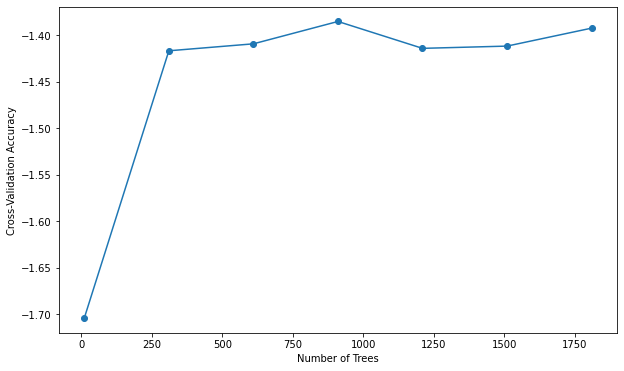

The optimal number of trees is 910


In [10]:
# 设置树的数目范围
n_estimators_range = range(10, 2000, 300)
cv_scores = []

# 使用交叉验证
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    #scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  # 5折交叉验证
    scores = cross_val_score(rf,X_train, y_train, cv=2, scoring='neg_mean_squared_error')  # 3折交叉验证
    cv_scores.append(scores.mean())

# 绘制交叉验证得分图
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
# plt.savefig('target.png') # 保存图片
plt.show()

# 选择最优数量的树
optimal_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is {}".format(optimal_n_estimators))

In [12]:
# 初始化和训练随机森林模型
rf = RandomForestClassifier(n_estimators=910, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=910, random_state=42)

In [34]:
# 保存模型
modle_path =r"D:\ArcgisData\pred_tl\pred_moudle" 
with open(f'{modle_path}\\rfmodel_test.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [14]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

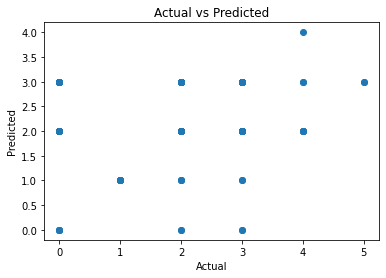

In [15]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [16]:
# 计算准确率Accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
# 计算精确率Precision
# 计算召回率Recall
# 计算F1-score
# 计算ROC曲线下的面积
# 计算混淆矩阵
train_accuracy,test_accuracy

(1.0, 0.550561797752809)

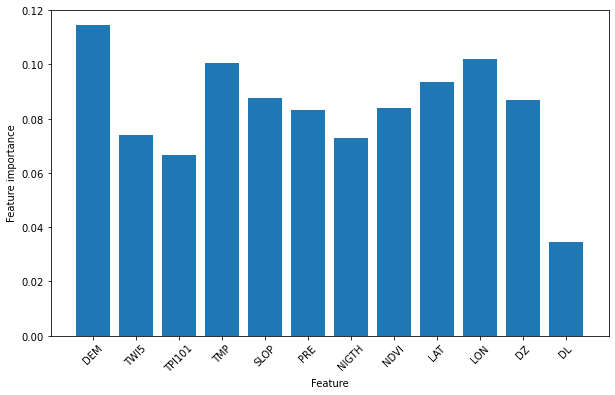

In [17]:
import matplotlib.pyplot as plt
importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importance, align='center')
plt.xticks(np.arange(len(features)), features, rotation = 45)
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.show()

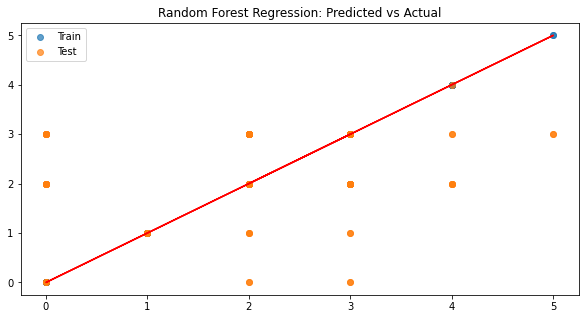

In [18]:
# 在训练集和测试集上的预测值

train_preds = rf.predict(X_train)

test_preds = rf.predict(X_test)



plt.figure(figsize=(10,5))



# 画出训练集的散点图

plt.scatter(y_train, train_preds, label='Train', alpha=.7)

# 画出测试集的散点图

plt.scatter(y_test, test_preds, label='Test', alpha=.7)

# 画出y=x线
plt.plot(y_test, y_test, color='red')



plt.legend()

plt.title('Random Forest Regression: Predicted vs Actual')

plt.show()

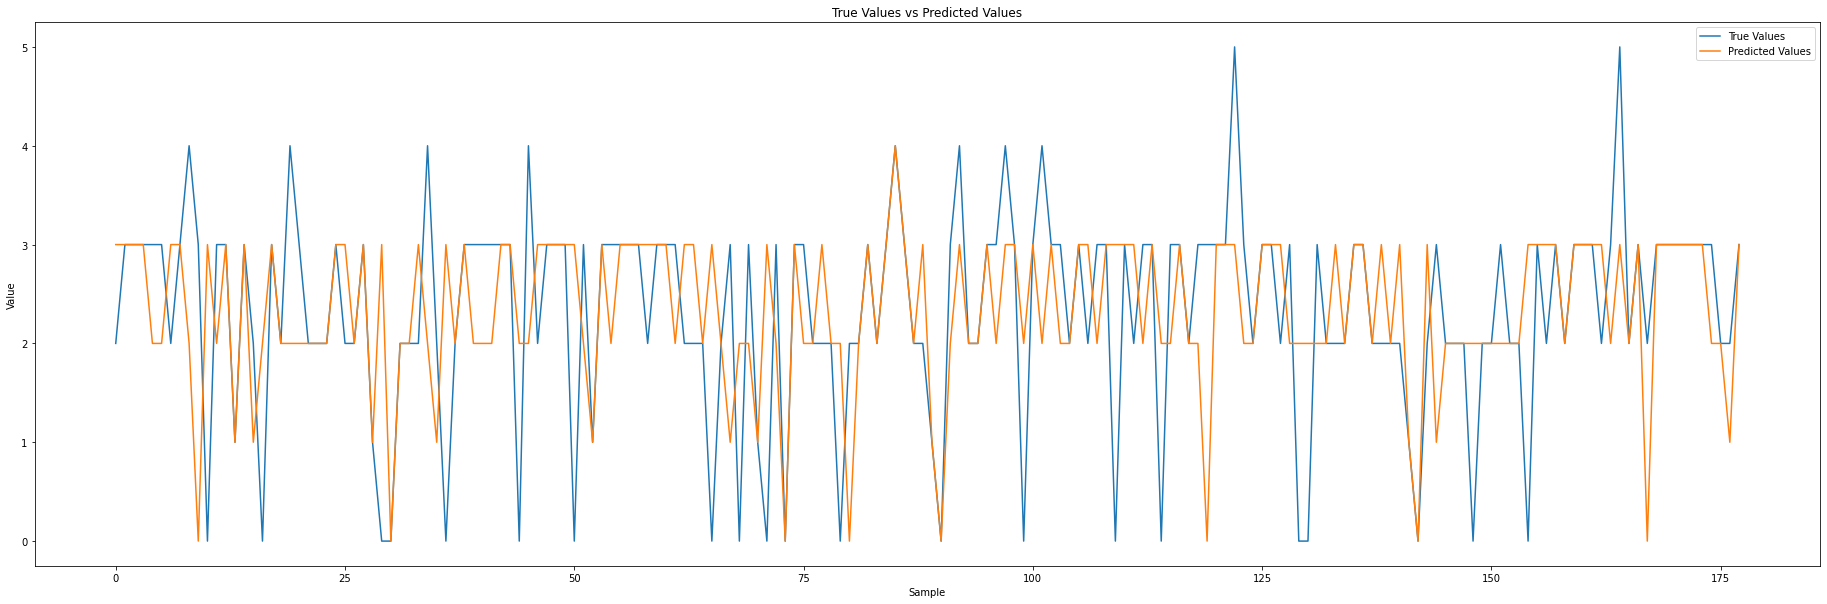

In [28]:
# 创建折线图
plt.figure(figsize=(32,10))
plt.plot(y_test.values, label='True Values')
plt.plot(y_test_pred, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()
